In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')

df.head()

C:\Users\rushi\AppData\Local\Temp\ipykernel_8180\249104501.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3170003V,240000438,Montgomery County Police,Property Damage Crash,01/03/2024 02:55:00 PM,NaN,NaN,NaN,NaN,IN FRONT OF 18900 BIRDSEYE DR,...,0,No,No,2017,LEXUS,SUV,NO MISUSE,39.165005,-77.249310,"(39.16500483, -77.24931)"
1,MCP3254003K,230072050,Montgomery County Police,Injury Crash,12/16/2023 12:36:00 PM,Maryland (State),GERMANTOWN RD,County,MIDDLEBROOK RD,NaN,...,35,No,No,2010,TOYT,PRIUS,NO MISUSE,39.178776,-77.267190,"(39.17877577, -77.26718974)"
2,EJ7887003Q,230074270,Gaithersburg Police Depar,Injury Crash,12/29/2023 12:00:00 PM,Maryland (State),GREAT SENECA HWY,Municipality,KENTLANDS BLVD,NaN,...,35,No,No,2021,SUBARU,FORRESTER,NO MISUSE,39.123574,-77.231769,"(39.12357374, -77.231769)"
3,MCP2674004J,230064598,Montgomery County Police,Property Damage Crash,11/05/2023 09:07:00 PM,Maryland (State),WOODFIELD RD,County,GLENDALOUGH RD,NaN,...,40,No,No,2019,DODGE,CHARGER,NO MISUSE,39.211742,-77.171461,"(39.21174219, -77.17146065)"
4,MCP25280008,230067019,Montgomery County Police,Property Damage Crash,11/18/2023 12:40:00 AM,Maryland (State),CLARKSBURG RD,Maryland (State),CLARKSBURG RD,NaN,...,20,No,No,2014,NISSAN,ROGUE,NaN,39.228915,-77.289091,"(39.22891483, -77.28909117)"


In [7]:
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [8]:
df.info

<bound method DataFrame.info of        Report Number Local Case Number                Agency Name  \
0        MCP3170003V         240000438   Montgomery County Police   
1        MCP3254003K         230072050   Montgomery County Police   
2         EJ7887003Q         230074270  Gaithersburg Police Depar   
3        MCP2674004J         230064598   Montgomery County Police   
4        MCP25280008         230067019   Montgomery County Police   
...              ...               ...                        ...   
172100    DM8338000C          16010228  Takoma Park Police Depart   
172101   MCP1182001S         170519976   Montgomery County Police   
172102   MCP1453008X         200046217   Montgomery County Police   
172103   MCP2568000M         190056701   Montgomery County Police   
172104   MCP1048000P          15003337   Montgomery County Police   

             ACRS Report Type         Crash Date/Time        Route Type  \
0       Property Damage Crash  01/03/2024 02:55:00 PM           

C:\Users\rushi\AppData\Local\Temp\ipykernel_8180\1189407675.py:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


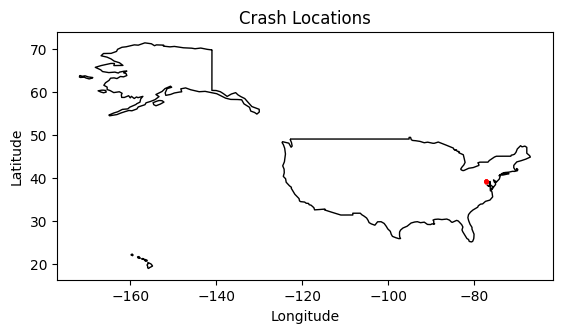

In [12]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# Sample data snippet
data = {
    "Longitude": [-77.24931, -77.26718974, -77.231769, -77.17146065],
    "Latitude": [39.16500483, 39.17877577, 39.12357374, 39.21174219]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Load a map of the area
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Assuming the crashes are around the USA, specifically around Maryland
base = world[world.name == "United States of America"].plot(color='white', edgecolor='black')

# Plot points
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.title('Crash Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
